In [119]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", UserWarning)

%matplotlib inline

This is a smile: [ True]


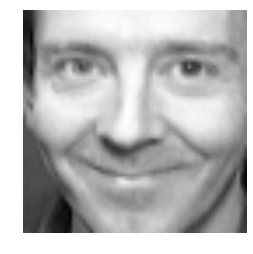

In [45]:
# TEST THE CLASSIFIER AGAINST THE DATA WITH WHICH IT WAS TRAINED, I.E. THE OLIVETTI DATABASE
%run evaluatesvc.py

In [228]:
# USE A TEST FACE FROM THE KAROLINISKA DATABASE C:\Users\ileppane\KDEF
import cv2
import smilerecognition

strings1=["C:\Users\ileppane\KDEF\KDEF\AF"]*35+["C:\Users\ileppane\KDEF\KDEF\AM"]*35+["C:\Users\ileppane\KDEF\KDEF\BF"]*35+["C:\Users\ileppane\KDEF\KDEF\BM"]*35  
numbers=range(1,36)+range(1,36)+range(1,36)+range(1,36)
strings2=["\AF"]*35+["\AM"]*35+["\BF"]*35+["\BM"]*35
strings3=["HAS.JPG"]*35+["HAS.JPG"]*35+["HAS.JPG"]*35+["HAS.JPG"]*35
strings4=["NES.JPG"]*35+["NES.JPG"]*35+["NES.JPG"]*35+["NES.JPG"]*35
happyfaces=[]
neutralfaces=[]
for i in xrange(len(numbers)):
    happyfaces.append("%s%02d%s%02d%s" % (strings1[i],numbers[i],strings2[i],numbers[i],strings3[i]))
    neutralfaces.append("%s%02d%s%02d%s" % (strings1[i],numbers[i],strings2[i],numbers[i],strings4[i]))

# pick a random face from the database
#testface = cv2.imread(happyfaces[randint(1,len(happyfaces))])
#gray, detface = smilerecognition.detect_face(testface)

#happynum=0
#neutralnum=0
#happynodetect=0
#neutralnodetect=0

for i in xrange(140):
    testface = cv2.imread(neutralfaces[i])
    gray, detface = smilerecognition.detect_face(testface)
    if len(detface)==1:
        #face_index = 0
        for face in detface:
            (x, y, w, h) = face
            if w > 100: #w pienenee kun etaisyys kamerasta kasvaa
                extracted_face = smilerecognition.extract_face_features(gray, face, (0.15, 0.2)) # (0.15,0.2) antaa smile
                prediction_result = smilerecognition.predict_face_is_smiling(extracted_face)
                #cv2.rectangle(testface, (x, y), (x+w, y+h), (0, 255, 0), 2)
  
        if prediction_result == 1:
            neutralnum += 1
            #print "smile"
        #else:
            #print "no smile"        
            
        # PRINT THE OUTPUT
        #subplot(121)
        #imshow(cv2.cvtColor(testface, cv2.COLOR_BGR2GRAY), cmap='gray')
        #subplot(122)
        #imshow(extracted_face, cmap='gray')
    else:
        neutralnodetect+=1
        #print "Error: no face detected"



In [229]:
# ACCURACY
print "Type I:"
print float(happynum)/float(140-happynodetect)
print "Type II:"
print float(neutralnum)/float(140-neutralnodetect)

Type I:
0.977941176471
Type II:
0.166666666667


In [230]:
happynum

133

In [231]:
neutralnum

23

In [232]:
neutralnodetect

2

In [233]:
happynodetect

4